##  Logistic Regression

### Загрузка данных

In [1]:
# Проверим нашу рабочую директорию
import os

dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /home/tim/02_ML
Directory name is : 02_ML


In [2]:
# При необходимости, поменяем на новую рабочую директорию.
os.chdir('/home/tim/02_ML')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("ex2data1.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Plotting of Data

Text(0, 0.5, 'Exam 2 Score')

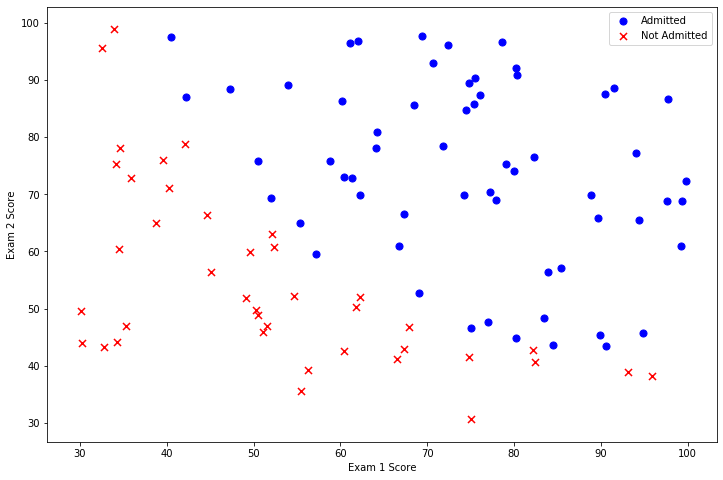

In [5]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

### Sigmoid function Сигмоид-функция.

$ g(z) = \frac{1}{(1+e^{-z})}$

In [6]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

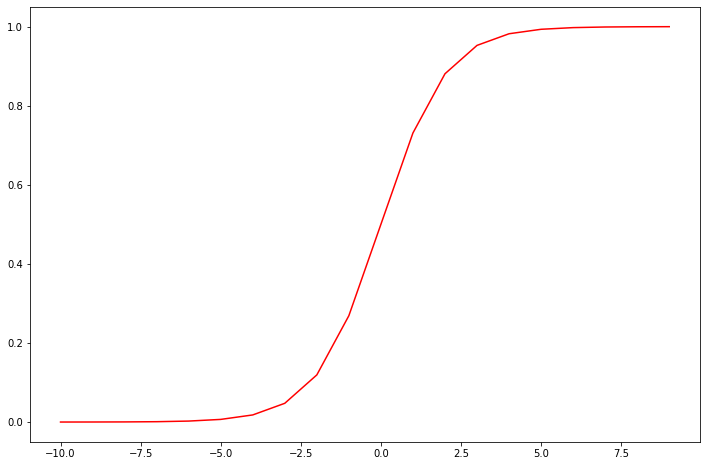

In [7]:
# проверим, что функция работает
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [8]:
def costFunction(theta, X, y):
    """
    Функция потерь логистической регрессии
    """
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [9]:
def featureNormalization(X):
    """
    Нормализация данных. Если features (признаки) отличаются на порядки,
    то их масштабирование существенно ускоряет работу метода градиентного спуска. 
    """
    # среднее и стандартное отклонение:
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
m , n = X.shape[0], X.shape[1]
print(X.shape, y.shape)
print('m =',m,'; n =', n)

(100, 2) (100,)
m = 100 ; n = 2


In [11]:
X, X_mean, X_std = featureNormalization(X)
# для простоты записи вводится фиктивный признак X_{0}= 1 
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
# Начальная theta = нули
initial_theta = np.zeros((n+1,1))
# Рсчет функции потерь и градиента для первоначальной theta 
cost, grad= costFunction(initial_theta,X,y)
print("Функция потерь для первоначальной theta:",cost)
print("Градиент для первоначальной theta (с нулевыми значениями):",grad)

Функция потерь для первоначальной theta: 0.693147180559946
Градиент для первоначальной theta (с нулевыми значениями): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [12]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [13]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [14]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

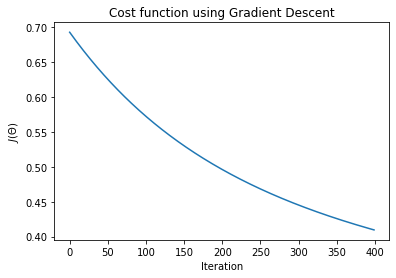

In [15]:
theta , J_history = gradientDescent(X,y,initial_theta,0.01,400)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Cost function using Gradient Descent')

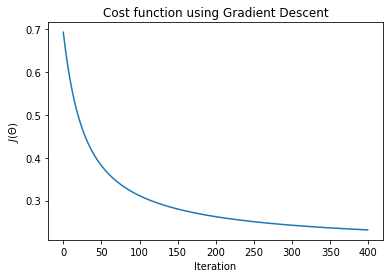

In [16]:
theta , J_history = gradientDescent(X,y,initial_theta,0.1,400)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Cost function using Gradient Descent')

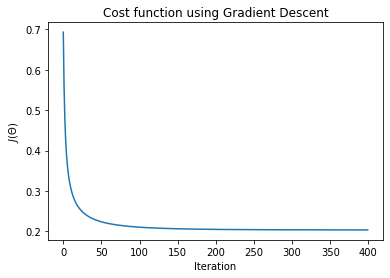

In [17]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

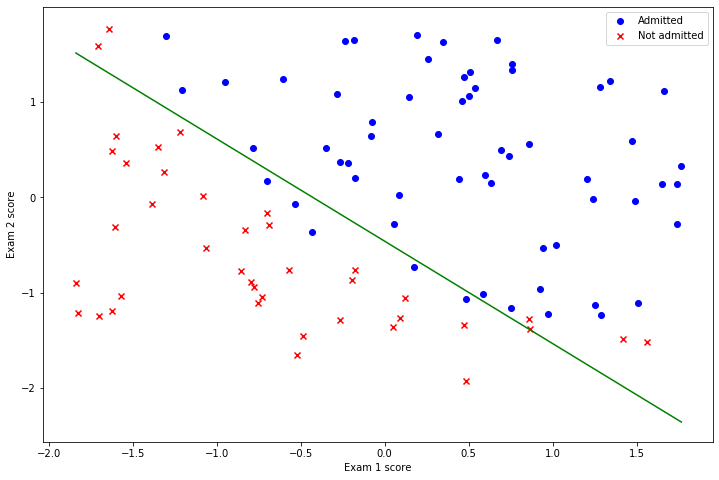

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="b",marker="o",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="r",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [19]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [20]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


### Accuracy on training set 

In [21]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
